Question 1: What is the difference between K-Means and Hierarchical Clustering?
Provide a use case for each.

Ans- K-Means and Hierarchical Clustering differ mainly in how they form clusters and how much prior information they require. K-Means is a partition-based, centroid-driven algorithm that divides the data into a fixed number of clusters specified in advance and iteratively updates cluster centroids to minimize within-cluster variance. It is computationally efficient and works well for large datasets, but it is sensitive to the initial choice of centroids, outliers, and assumes clusters are roughly spherical and similar in size. In contrast, Hierarchical Clustering builds clusters step by step, either by progressively merging smaller clusters (agglomerative) or splitting larger ones (divisive), creating a tree-like structure called a dendrogram that shows relationships among data points at different levels. It does not require the number of clusters to be predefined and can capture more complex cluster shapes, but it is computationally more expensive and less suitable for very large datasets.

Use Case for K-Means

Customer Segmentation in Marketing

A company wants to group thousands of customers based on features like age, income, and spending score.

The number of segments is known in advance (e.g., 5 customer types).

The dataset is large, and fast computation is needed.

 K-Means is suitable because it is fast, scalable, and effective when K is known.

 Use Case for Hierarchical Clustering

Document or Gene Analysis

In bioinformatics or text analysis, researchers want to understand relationships at multiple levels, such as grouping genes or documents into subtopics and broader themes.

Hierarchical clustering is ideal because it reveals nested structures and does not require predefining the number of clusters.

Question 2: Explain the purpose of the Silhouette Score in evaluating clustering
algorithms

Ans- The **Silhouette Score** evaluates the quality of clustering by measuring how well data points fit within their assigned clusters compared to other clusters. It reflects both **cohesion** (how close points in the same cluster are) and **separation** (how far apart different clusters are). The score ranges from **–1 to +1**, where higher values indicate well-formed, clearly separated clusters, values near zero suggest overlapping clusters, and negative values indicate incorrect cluster assignments. This makes the Silhouette Score especially useful for comparing clustering algorithms or choosing the optimal number of clusters when no true labels are available.

**Example:**
Suppose a retail company applies **K-Means clustering** to customer data (age, income, spending score) and tests different numbers of clusters. When using **K = 2**, the Silhouette Score is **0.42**, indicating moderate overlap between clusters. For **K = 4**, the score increases to **0.65**, suggesting customers are more clearly grouped. However, for **K = 6**, the score drops to **0.38**, showing poorer separation. Based on these scores, the company would choose **K = 4** because it provides the best-defined customer segments.


Question 3: What are the core parameters of DBSCAN, and how do they influence the clustering process?

Ans-DBSCAN (Density-Based Spatial Clustering of Applications with Noise) relies on a few **core parameters** that determine how clusters are formed based on data density.

The first key parameter is **ε (epsilon)**, which defines the **maximum distance** between two points for them to be considered neighbors. A larger epsilon value allows more points to fall within the same neighborhood, leading to **larger and fewer clusters**, while a smaller epsilon results in **tighter, smaller clusters** and may label more points as noise.

The second core parameter is **MinPts (minimum points)**, which specifies the **minimum number of points required within an epsilon neighborhood** for a point to be considered a **core point**. A higher MinPts value makes the algorithm more conservative, requiring denser regions to form clusters and increasing the likelihood of points being classified as noise. A lower MinPts value allows clusters to form more easily, even in less dense areas.

Using these two parameters, DBSCAN classifies points into **core points** (dense regions), **border points** (points close to dense regions but not dense enough themselves), and **noise points** (outliers). Together, epsilon and MinPts control the **density threshold**, directly influencing cluster size, shape, and the algorithm’s ability to detect arbitrary-shaped clusters and handle noise.



Question 4: Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?

Ans- Feature scaling is important when applying clustering algorithms like **K-Means** and **DBSCAN** because these algorithms rely on **distance calculations** (such as Euclidean distance) to measure similarity between data points. If features are on different scales, variables with larger numeric ranges (for example, income in thousands versus age in years) will **dominate the distance computation**, causing the clustering results to be biased toward those features and ignoring others that may be equally important.

In **K-Means**, improper scaling can lead to incorrect centroid placement and poorly formed clusters, since the algorithm minimizes distances to cluster centroids. In **DBSCAN**, scaling directly affects the interpretation of the **epsilon (ε)** parameter, because ε represents a distance threshold; without scaling, it becomes difficult to choose a meaningful ε value, and clusters may merge incorrectly or too many points may be labeled as noise. By applying feature scaling methods such as **standardization** or **normalization**, all features contribute fairly to distance calculations, resulting in more accurate, stable, and interpretable clustering outcomes.


Question 5: What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?

Ans - The **Elbow Method** is a heuristic used in **K-Means clustering** to determine the optimal number of clusters (**K**). It works by running the K-Means algorithm for a range of K values and calculating the **Within-Cluster Sum of Squares (WCSS)**, also known as **inertia**, for each K. WCSS measures how compact the clusters are by summing the squared distances between each data point and its assigned cluster centroid.

As K increases, WCSS always decreases because data points are divided into smaller, tighter clusters. However, after a certain point, the improvement becomes marginal. When WCSS is plotted against K, this change appears as a **bend or “elbow”** in the curve. The value of K at this elbow is considered optimal because it represents a good trade-off between **model simplicity** and **cluster compactness**, avoiding both under-clustering (too few clusters) and over-clustering (too many clusters).

Example:
Suppose a company wants to cluster customers based on annual income and spending score. The K-Means algorithm is run for K values from 1 to 10. When the WCSS values are plotted, there is a steep drop from K = 1 to K = 3, a moderate drop from K = 3 to K = 4, and only slight improvements beyond K = 4. The curve forms a clear elbow at K = 4, suggesting that four customer segments capture most of the data structure without unnecessary complexity.

Question 6: Generate synthetic data using make_blobs(n_samples=300, centers=4),
apply KMeans clustering, and visualize the results with cluster centers.


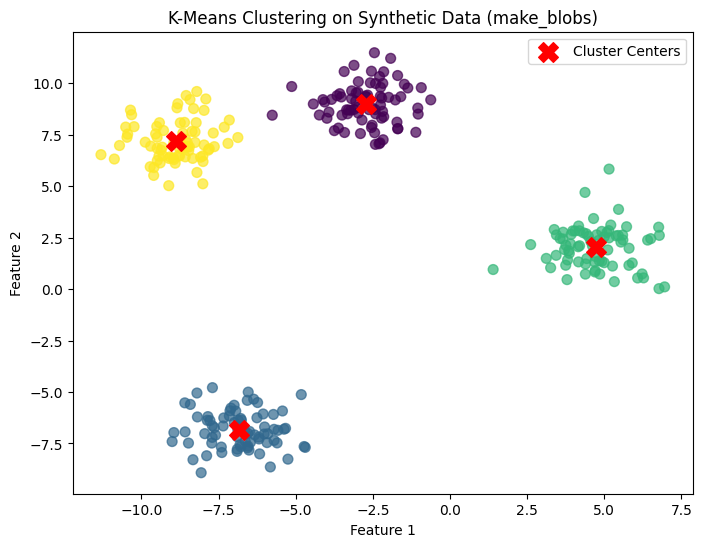

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 1. Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# 2. Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

# 3. Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Cluster Centers')
plt.title("K-Means Clustering on Synthetic Data (make_blobs)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


Question 7: Load the Wine dataset, apply StandardScaler , and then train a DBSCAN model. Print the number of clusters found (excluding noise).


In [2]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# 1. Load Wine dataset
data = load_wine()
X = data.data

# 2. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)  # eps may be tuned
labels = dbscan.fit_predict(X_scaled)

# 4. Count clusters (excluding noise, which is labeled as -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters found (excluding noise):", n_clusters)


Number of clusters found (excluding noise): 0


Question 8: Generate moon-shaped synthetic data using
make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in
the plot.

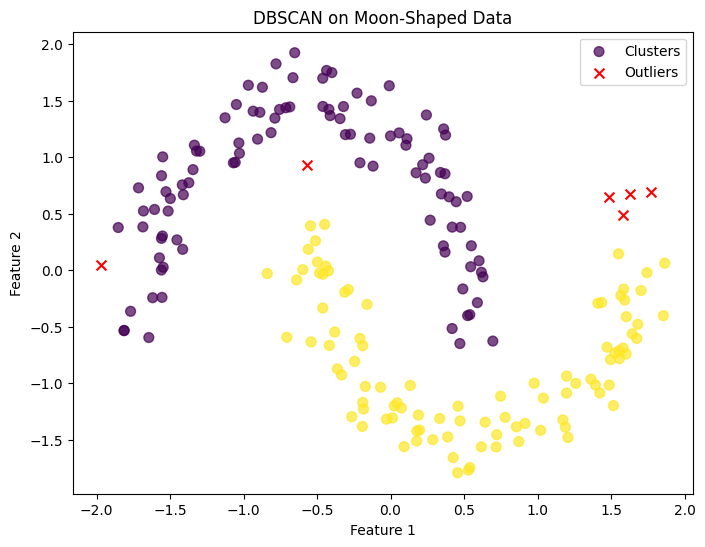

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# 1. Generate moon-shaped data
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# 2. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)  # eps may be tuned
labels = dbscan.fit_predict(X_scaled)

# 4. Identify core points and outliers
outliers = X_scaled[labels == -1]
clusters = X_scaled[labels != -1]

# 5. Plot clusters and outliers
plt.figure(figsize=(8, 6))
plt.scatter(clusters[:, 0], clusters[:, 1], c=labels[labels != -1], cmap='viridis', s=50, alpha=0.7, label='Clusters')
plt.scatter(outliers[:, 0], outliers[:, 1], c='red', s=50, marker='x', label='Outliers')
plt.title("DBSCAN on Moon-Shaped Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


Question 9: Load the Wine dataset, reduce it to 2D using PCA, then apply
Agglomerative Clustering and visualize the result in 2D with a scatter plot.


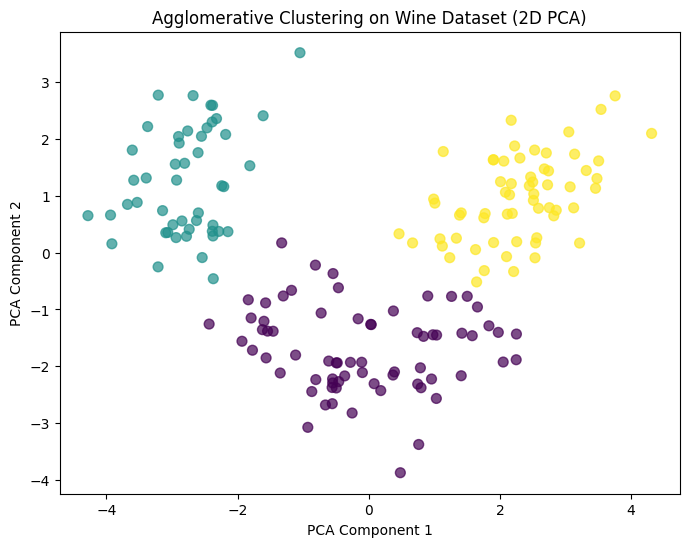

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# 1. Load Wine dataset
data = load_wine()
X = data.data

# 2. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Apply Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=3)  # Wine dataset has 3 classes
labels = agg_cluster.fit_predict(X_pca)

# 5. Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.title("Agglomerative Clustering on Wine Dataset (2D PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


Question 10: You are working as a data analyst at an e-commerce company. The
marketing team wants to segment customers based on their purchasing behavior to run
targeted promotions. The dataset contains customer demographics and their product
purchase history across categories.
Describe your real-world data science workflow using clustering:

● Which clustering algorithm(s) would you use and why?

● How would you preprocess the data (missing values, scaling)?

● How would you determine the number of clusters?

● How would the marketing team benefit from your clustering analysis?

Ans- Here’s a structured **real-world workflow** for customer segmentation using clustering in an e-commerce scenario:


### **1. Choosing a Clustering Algorithm**

* **K-Means**: Suitable if we expect **well-separated, roughly spherical clusters** and want a **fast, scalable solution** for large datasets.
* **DBSCAN**: Useful if we expect **clusters of varying shapes** or want to **detect outliers**, e.g., rare or unique purchasing behaviors.
* **Hierarchical/Agglomerative Clustering**: Helpful for **understanding nested relationships** between customer segments, such as subgroups within broader categories.

> Typically, I might start with **K-Means** for simplicity and scalability, then experiment with **DBSCAN or Hierarchical clustering** for deeper insights.


### **2. Data Preprocessing**

* **Handling missing values**:

  * Impute missing demographic or purchase data using mean/median (numerical) or mode (categorical).
* **Encoding categorical variables**:

  * Convert categories (e.g., gender, region) using **one-hot encoding** or **ordinal encoding**.
* **Scaling features**:

  * Apply **StandardScaler** or **MinMaxScaler**, especially important for algorithms like K-Means and DBSCAN that rely on **distance metrics**.
* **Feature selection/engineering**:

  * Aggregate purchase history into features like **total spend**, **frequency of purchase**, **category preferences**, or **recency**.


### **3. Determining the Number of Clusters**

* **Elbow Method**: Plot **WCSS vs. K** for K-Means and look for the “elbow” point.
* **Silhouette Score**: Evaluate cluster cohesion and separation for different K values.
* **Domain knowledge**: Marketing insight may suggest natural segment counts, e.g., high-value, occasional, or seasonal customers.


### **4. Benefits to the Marketing Team**

* **Targeted promotions**: Each cluster can receive personalized campaigns based on **spending behavior or preferred categories**.
* **Resource optimization**: Focus marketing budget on **high-value clusters**.
* **Product recommendations**: Suggest products tailored to the cluster’s **purchase patterns**.
* **Customer insights**: Understand **behavioral patterns, demographics, and potential growth areas** within each segment.


**Summary Workflow:**

1. **Data cleaning and preprocessing** (handle missing values, encode, scale).
2. **Feature engineering** (purchase patterns, frequency, recency).
3. **Clustering** (K-Means/DBSCAN/Hierarchical).
4. **Cluster validation** (Elbow, Silhouette).
5. **Actionable insights** for marketing campaigns.

> Using this workflow, the marketing team can move from generic promotions to **data-driven, highly targeted strategies**, improving conversion rates and customer engagement.



Synthetic dataset generated with shape: (500, 12)
First 5 rows of the synthetic dataset:


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,gender,region
0,NaN,0.559880,0.790419,1.904434,1.455031,-0.605393,-1.386091,0.479248,0.148625,1.138416,Male,East
1,1.275103,0.260407,0.855458,1.035825,-1.267536,-0.273122,1.039726,0.993780,-0.297075,1.054432,Female,West
2,0.403832,0.530064,1.825629,-1.204693,-0.523093,0.505404,0.951837,0.778421,-0.987112,0.195845,Female,NaN
3,1.711848,1.419382,0.542468,0.338252,1.210659,-0.181385,-1.013120,-1.168529,2.500145,-0.494354,Male,South
4,1.433324,0.237100,-0.056826,0.933232,-1.473582,-0.630312,0.179725,1.639895,-0.562057,-1.008055,Male,North


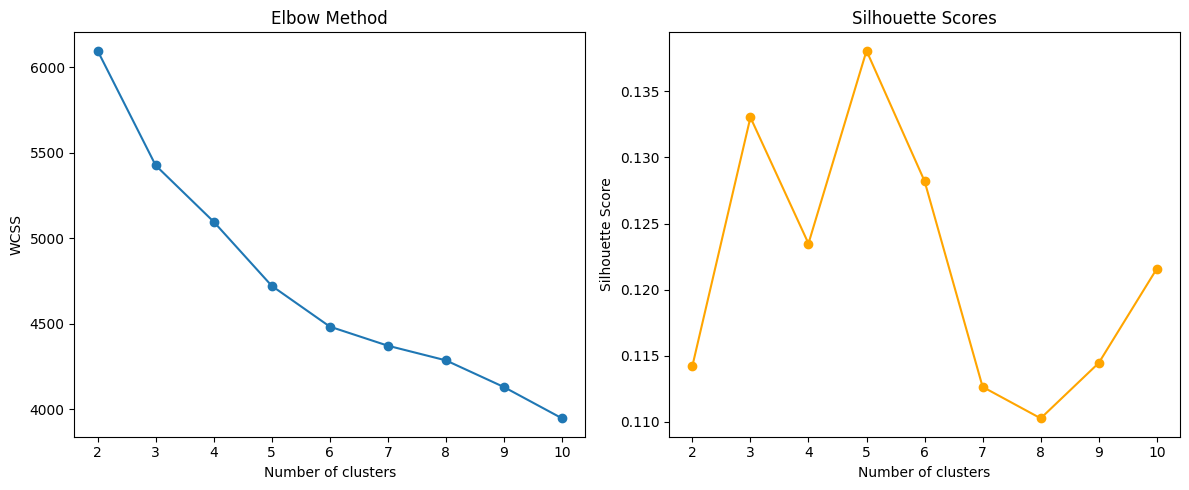

Cluster Summary:
         feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
Cluster                                                                     
0         0.941969   1.016772   0.843989  -0.023101  -0.956875  -0.027251   
1         1.856610   0.259079   1.875222   0.020609   0.012536   0.171092   
2         0.077115   1.729777  -0.070947  -0.014785   1.638802  -0.190090   

         feature_6  feature_7  feature_8  feature_9  
Cluster                                              
0         0.037595   1.137380  -0.829768   0.059730  
1         2.104127  -1.134123   2.248059  -0.089723  
2        -2.314537  -0.794155   0.895202   0.110013  


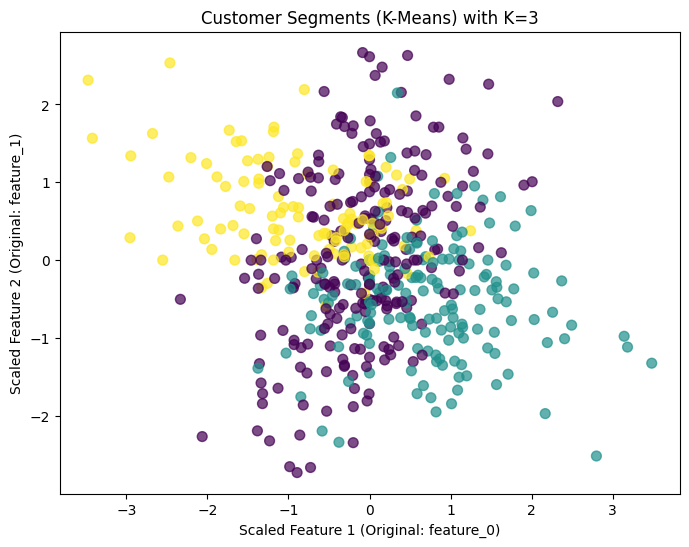

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# ------------------------------
# Step 1: Generate synthetic dataset
# ------------------------------
# Generate a synthetic dataset with 500 samples, 10 features, 5 informative features
X_synth, y_synth = make_classification(n_samples=500, n_features=10, n_informative=5, n_redundant=2, n_repeated=0, n_classes=2, n_clusters_per_class=1, random_state=42)

# Convert to DataFrame
df = pd.DataFrame(X_synth, columns=[f'feature_{i}' for i in range(X_synth.shape[1])])

# Add some dummy categorical features to simulate a customer dataset
df['gender'] = np.random.choice(['Male', 'Female'], size=len(df))
df['region'] = np.random.choice(['North', 'South', 'East', 'West'], size=len(df))

# Introduce some missing values randomly for demonstration of imputation
for col in df.columns: # Introduce 5% missing values
    mask = np.random.rand(len(df)) < 0.05
    df.loc[mask, col] = np.nan

print("Synthetic dataset generated with shape:", df.shape)
print("First 5 rows of the synthetic dataset:")
display(df.head())

# ------------------------------
# Step 2: Handle missing values
# ------------------------------
# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(exclude=np.number).columns

# Impute numeric with mean
imputer_num = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer_num.fit_transform(df[numeric_cols])

# Impute categorical with most frequent value
imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

# ------------------------------
# Step 3: Encode categorical variables
# ------------------------------
encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore') # Use sparse_output instead of sparse
encoded_cat = encoder.fit_transform(df[categorical_cols])
encoded_cat_df = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(categorical_cols))

# Combine numeric and encoded categorical features
X = pd.concat([df[numeric_cols], encoded_cat_df], axis=1)

# ------------------------------
# Step 4: Feature scaling
# ------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------
# Step 5: Determine optimal number of clusters (Elbow & Silhouette)
# ------------------------------
wcss = []
silhouette_scores = []
K_range = range(2, 11)  # Test clusters from 2 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto') # Added n_init='auto'
    labels = kmeans.fit_predict(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Plot Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', color='orange')
plt.title("Silhouette Scores")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.tight_layout() # Added for better plot display
plt.show()

# ------------------------------
# Step 6: Apply K-Means with chosen K
# ------------------------------
# Determine optimal_k from the plots - typically based on visual inspection
# For this synthetic dataset, let's assume 3 is a reasonable choice for demonstration
optimal_k = 3  # Example: choose based on elbow/silhouette
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to original dataset
df['Cluster'] = cluster_labels

# ------------------------------
# Step 7: Analyze cluster characteristics
# ------------------------------
cluster_summary = df.groupby('Cluster').mean(numeric_only=True) # Added numeric_only=True
print("Cluster Summary:")
print(cluster_summary)

# Optional: Visualize clusters using first two features (if applicable)
# For this multi-dimensional synthetic data, visualizing only the first two scaled features
# might not represent all clusters well, but can show initial separation.
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.7)
plt.title(f"Customer Segments (K-Means) with K={optimal_k}")
plt.xlabel(f"Scaled Feature 1 (Original: {X.columns[0]})")
plt.ylabel(f"Scaled Feature 2 (Original: {X.columns[1]})")
plt.show()